In [1]:
!pip install pandas numpy matplotlib seaborn statsmodels plotly


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from pandas.plotting import autocorrelation_plot, lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
# 🔹 Create Sample Time Series Data
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'Value': np.cumsum(np.random.randn(100) * 5) + 50  # Random walk to simulate time series
}
df = pd.DataFrame(data)
df['Month'] = df['Date'].dt.month  # Extract month for boxplot

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



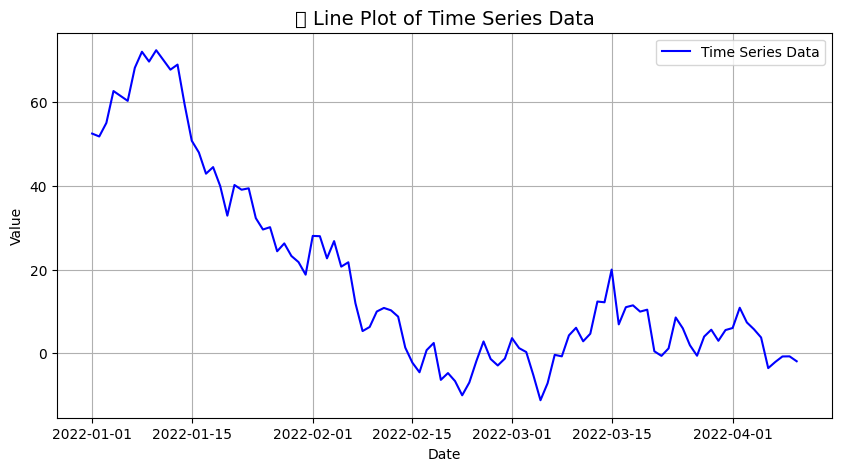

In [11]:
# 🔹 1. Line Plot (Time Series Trend)
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Value'], label='Time Series Data', color='blue')
plt.title('📈 Line Plot of Time Series Data', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.



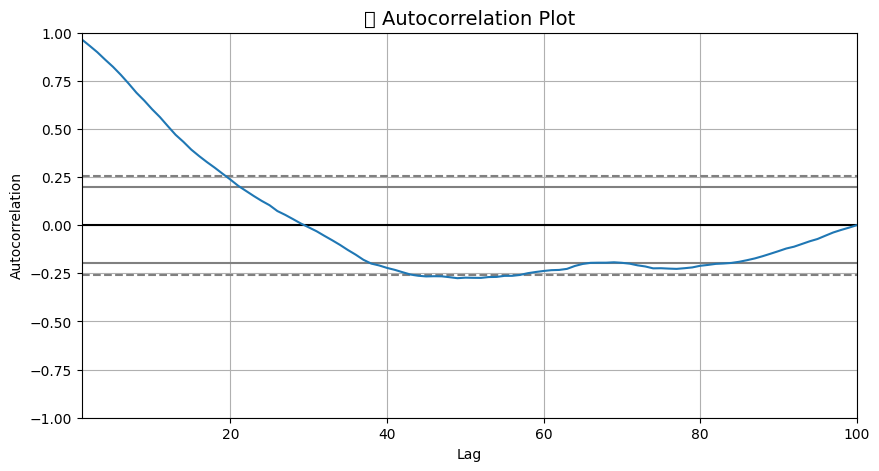

In [12]:
# 🔹 2. Autocorrelation Plot (Check Seasonality & Patterns)
plt.figure(figsize=(10, 5))
autocorrelation_plot(df['Value'])
plt.title('🔁 Autocorrelation Plot', fontsize=14)
plt.show()


<ipython-input-14-abcf7b4bc868>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.



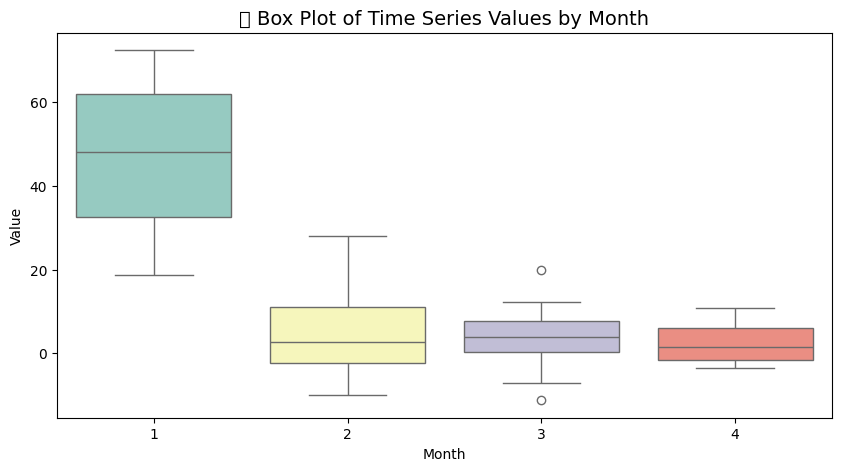

In [14]:
# 🔹 3. Box Plot (Distribution of Values by Month)
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='Value', data=df, palette='Set3')
plt.title('📦 Box Plot of Time Series Values by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Value')
plt.show()

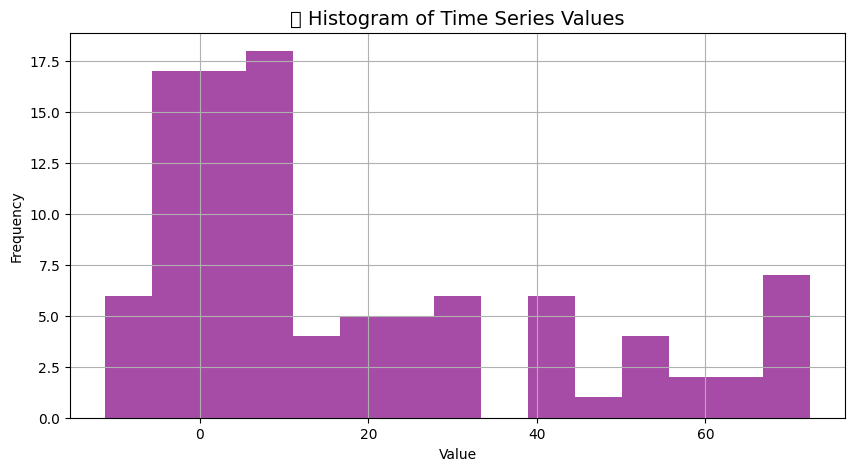

In [16]:
# 🔹 4. Histogram (Value Distribution)
plt.figure(figsize=(10, 5))
plt.hist(df['Value'], bins=15, color='purple', alpha=0.7)
plt.title('📊 Histogram of Time Series Values', fontsize=14)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.



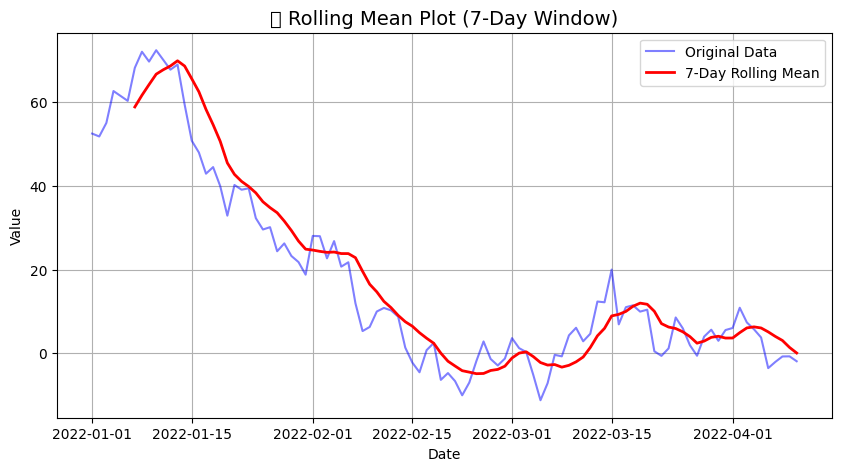

In [17]:
# 🔹 5. Rolling Mean Plot (Trend Smoothing)
df['Rolling_Mean'] = df['Value'].rolling(window=7).mean()
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Value'], label='Original Data', color='blue', alpha=0.5)
plt.plot(df['Date'], df['Rolling_Mean'], label='7-Day Rolling Mean', color='red', linewidth=2)
plt.title('📉 Rolling Mean Plot (7-Day Window)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# 🔹 6. Interactive Time Series Plot (Plotly)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Value'], mode='lines', name='Time Series'))
fig.update_layout(title='🌍 Interactive Time Series Plot (Plotly)',
                  xaxis_title='Date', yaxis_title='Value')
fig.show()